In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,r2_score, mean_squared_error ,roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 


K_FOLD function

In [54]:

 
def KFOLD_REGRESSION(X, y, count, model, dt ): 
    kf = KFold(n_splits=count, shuffle=True, random_state=42)  
    r2_scores = [] 
    roc_auc_scores=[]
    rmse_scores = [] 
    best_fold = 0  
    y_trains = [] 
    X_trains=[]
    X_tests=[]
    y_tests=[] 
    for fold, (train_index, test_index) in enumerate(kf.split(X)):  
        X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]  
     
        # Fit your model here  
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)  
        y_trains.append(y_train)
        X_trains.append(X_train)
        X_tests.append(X_test)
        y_tests.append(y_test)

        r2 = r2_score(y_test, y_pred)  
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
        roc_auc=roc_auc_score(y_test, y_pred)
        r2_scores.append(r2) 
        rmse_scores.append(rmse) 
        roc_auc_scores.append(roc_auc)
        
        print(f"Fold {fold+1}: R2 = {r2:.4f}, RMSE = {rmse:.4f} , Roc Auc = {roc_auc}")  
     
    best_fold = np.argmax(r2_scores) + 1 
    best_y_train=y_trains[best_fold]
    best_X_train=X_trains[best_fold]
    best_X_test=X_tests[best_fold]
        
    best_y_test= y_tests[best_fold]
    print(f"Best fold: {best_fold}") 
    part_size = len(dt) // count 
    k_fold_best_test_data = [dt[i*part_size:(i+1)*part_size] for i in range(count)][best_fold-1] 
    new_data = dt.drop(k_fold_best_test_data.index)  
    new_data = pd.concat([new_data, k_fold_best_test_data])  
     
   
    return best_X_train,best_y_train,best_X_test,best_y_test ,k_fold_best_test_data, r2_scores, rmse_scores 

preproccessing

In [55]:
dt=pd.read_csv("./heart.csv")

X,y=dt.drop('target',axis=1),dt['target']
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [57]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


normalize data

In [58]:
X=np.array(X)
y=np.array(y)
scaler=StandardScaler()
X=scaler.fit_transform(X)
X


array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

best model

In [59]:

models = [{"model":DecisionTreeClassifier(),
           "param_grid":{'max_depth': [10, 20, 30,40,50], 'min_samples_split': [2, 5, 10,15,20],'max_features':['auto', 'sqrt', 'log2']}}
         ,{ 
            "model":RandomForestClassifier(),
            "param_grid": {'max_depth': [10, 20, 30,40,50],'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
            }, { 
            "model":KNeighborsClassifier(),
            "param_grid":  {'n_neighbors': [2, 5, 10,15,20], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] ,'leaf_size':[10,15,20]}
             }
            
            ]


# Find the best model and its best hyperparameters
best_model = None
best_score = 0
count=5
for i in range(len(models)):
    model=models[i]['model']
    param_grid=models[i]['param_grid']
    grid_search = GridSearchCV(model, param_grid,scoring='accuracy', verbose=0)
    X_train,y_train,X_test,y_test ,k_fold_best_test_data, r2_scores, rmse_scores =KFOLD_REGRESSION(X, y, count, model, dt)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    Roc_Auc=roc_auc_score(y_test, y_pred)
    model_name= model.__class__.__name__
    print("Model Name:",model_name)

    print("Roc_Auc",Roc_Auc)
    if model_name=='DecisionTreeClassifier':

        fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred)
    elif  model_name=='KNeighborsClassifier':
        fpr_kn, tpr_kn, _ = roc_curve(y_test, y_pred)
    elif  model_name=='RandomForestClassifier':

        fpr_rf, tpr_rf, _ = roc_curve(y_test,y_pred)

    print(classification_report(y_test, y_pred))

    if grid_search.best_score_ > best_score:
        best_model = grid_search.best_estimator_
        best_score = grid_search.best_score_

# Train the best model on the whole training set
best_model.fit(X_train, y_train)

# Report the results on the test set
print("Best Model: ", best_model)
print("Test Set Accuracy: ", best_model.score(X_test, y_test))

Fold 1: R2 = 0.9415, RMSE = 0.1210 , Roc Auc = 0.9854368932038835
Fold 2: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Fold 3: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Fold 4: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Fold 5: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Best fold: 2


/Users/pouya/Desktop/machin_learning_work/envwork/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
125 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pouya/Desktop/machin_learning_work/envwork/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pouya/Desktop/machin_learning_work/envwork/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/pouya/Desktop/machin_learning_work/envwork/lib/python3.11/si

Model Name: DecisionTreeClassifier
Roc_Auc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       114

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Fold 1: R2 = 0.9415, RMSE = 0.1210 , Roc Auc = 0.9854368932038835
Fold 2: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Fold 3: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Fold 4: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Fold 5: R2 = 1.0000, RMSE = 0.0000 , Roc Auc = 1.0
Best fold: 2
Model Name: RandomForestClassifier
Roc_Auc 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       114

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00 

roc_auc_dt 1.0


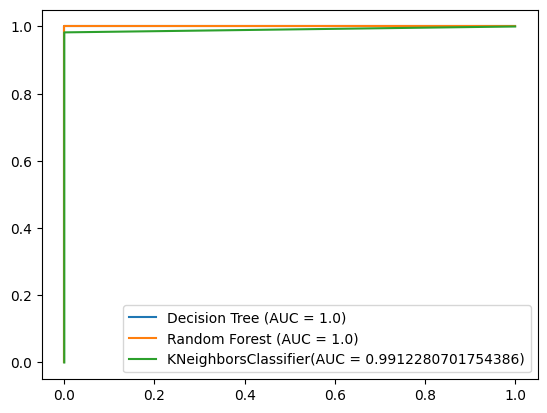

In [67]:

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_kn= auc(fpr_kn, tpr_kn, )
# Plot the ROC curves
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt})' )
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf})' )
plt.plot(fpr_kn, tpr_kn, label=f'KNeighborsClassifier(AUC = {roc_auc_kn})' )

# Set the plot title and labels

plt.legend()

# Show the plot
plt.show()